<a href="https://colab.research.google.com/github/misterdry/Pyhton-Projects/blob/main/Weekly_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving weekly_report.xlsx to weekly_report.xlsx


In [ ]:
df = pd.read_excel('weekly_report.xlsx')
df

,SOCIEDAD,PROCESO,INCIDENCIAS ABIERTAS,INCIDENCIAS RESUELTAS,INCIDENCIAS PENDIENTES,PRIORIDAD,SLA/HORAS,SLA REAL/HORAS,DESARROLLO/HORAS
0,GTS,ENA_021,0,0,0,NaN,0,0,0
1,GTS,ENA_026,0,0,0,NaN,0,0,0
2,GTS,ENA_004,0,0,0,NaN,0,0,0
3,GTS,ENA_005,0,0,0,NaN,0,0,0
4,GTS,ENA_006,0,0,0,NaN,0,0,0
5,GTS,ENA_007,0,0,0,NaN,0,0,0
6,GTS,ENA_008,0,0,0,NaN,0,0,0
7,GTS,ENA_009,1,0,1,MED,45,0,0
8,GTS,ENA_010,0,0,0,NaN,0,0,0
9,GTS,ENA_011,0,0,0,NaN,0,0,0


In [ ]:
df['PROCESO']


0     ENA_021
1     ENA_026
2     ENA_004
3     ENA_005
4     ENA_006
5     ENA_007
6     ENA_008
7     ENA_009
8     ENA_010
9     ENA_011
10    ENA_014
11    ENA_015
12    ENA_001
13    ENA_002
14    ENA_003
15    ENA_016
16    ENA_017
17    ENA_018
18    ENA_019
19    ENA_020
20    ENA_028
21    ENA_029
22    ENA_013
23    ENA_022
24    ENA_023
25    ENA_024
26    ENA_025
27    ENA_000
28    ENA_SUP
Name: PROCESO, dtype: object

In [ ]:
df_grouped = df.groupby('SOCIEDAD')[['INCIDENCIAS ABIERTAS', 'INCIDENCIAS RESUELTAS', 'INCIDENCIAS PENDIENTES']].sum()
df_grouped

,INCIDENCIAS ABIERTAS,INCIDENCIAS RESUELTAS,INCIDENCIAS PENDIENTES
SOCIEDAD,,,
GTS,1,0,1
SA,5,5,0
TTE,0,0,0


In [ ]:
df_grouped['INCIDENCIAS ABIERTAS']

SOCIEDAD
GTS    1
SA     5
TTE    0
Name: INCIDENCIAS ABIERTAS, dtype: int64

In [ ]:
from datetime import datetime, timedelta # Importar el módulo datetime y el objeto timedelta
hoy = datetime.today() # Obtener la fecha de hoy
hace_siete_dias = hoy - timedelta(days=7) # Restar 7 días a la fecha de hoy
fecha = hace_siete_dias.strftime('%d/%m/%Y')
fecha
print(hace_siete_dias.date()) # Imprimir solo la parte de la fecha


2023-10-02


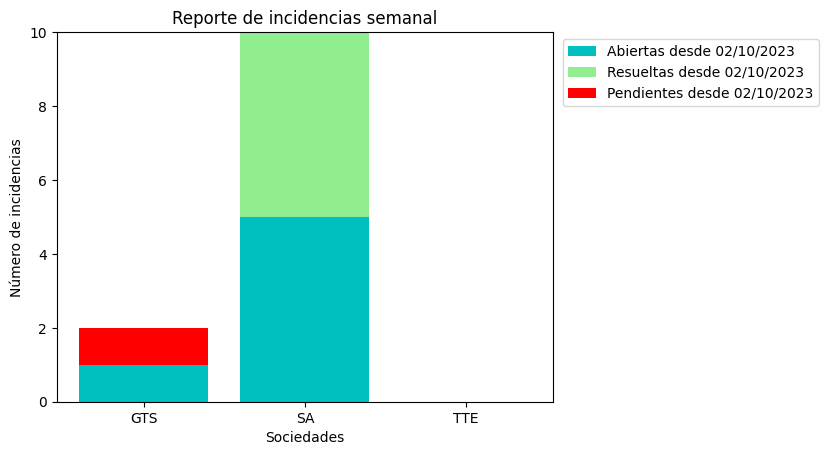

In [ ]:
import matplotlib.pyplot as plt
# Datos
sociedades = ('GTS', 'SA', 'TTE') # nombres de los grupos
abiertas = df_grouped['INCIDENCIAS ABIERTAS'] # incidencias abiertas por sociedad
resueltas = df_grouped['INCIDENCIAS RESUELTAS'] # incidencias resueltas por sociedad
pendientes = df_grouped['INCIDENCIAS PENDIENTES'] # incidencias pendientes por sociedad
fig, ax = plt.subplots()
# Gráfico de barras apiladas
ax.bar(sociedades, abiertas, label = "Abiertas desde " + fecha, color = "#00BFBF") # primera capa de barras con etiqueta "Abiertas" y color azul
ax.bar(sociedades, resueltas, bottom = abiertas, label = "Resueltas desde " + fecha, color = "#90EE90") # segunda capa de barras con etiqueta "Resueltas", color verde y desplazamiento igual a las incidencias abiertas
ax.bar(sociedades, pendientes, bottom = [x + y for x, y in zip(abiertas, resueltas)], label = "Pendientes desde " + fecha, color = "red") # tercera capa de barras con etiqueta "Pendientes", color rojo y desplazamiento igual a la suma de las incidencias abiertas y resueltas
ax.legend(bbox_to_anchor=(1.55, 1), loc = 'upper right') # leyenda en la esquina superior derecha
ax.set_ylabel('Número de incidencias') # etiqueta del eje y
ax.set_xlabel('Sociedades')
ax.set_title('Reporte de incidencias semanal')
plt.show() # mostrar el gráfico




In [ ]:
df_analysis = pd.DataFrame(df, columns = ['PROCESO', 'SLA/HORAS', 'DESARROLLO/HORAS', 'SLA REAL/HORAS'])
df_analysis = df_analysis[df_analysis.apply(pd.to_numeric, errors="ignore").all(axis=1)]
df_analysis_1 = df_analysis.drop('PROCESO', axis = 1)

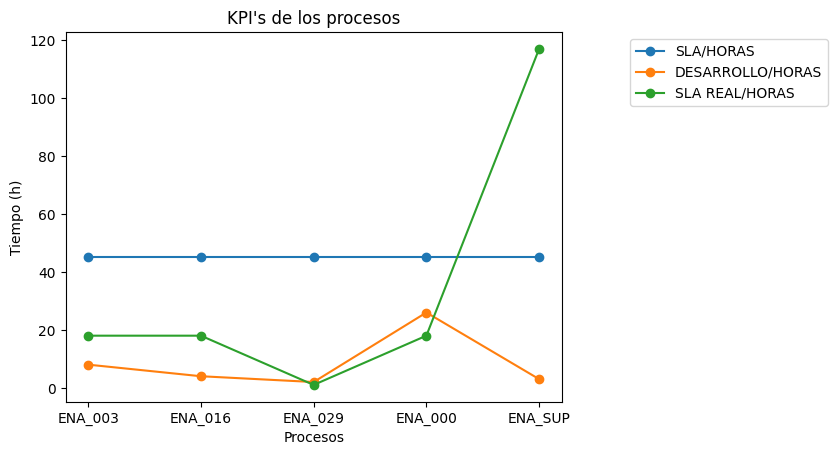

In [ ]:
import matplotlib.pyplot as plt
# Datos
sociedades = df_analysis['PROCESO'] # nombres de los grupos

# Gráfico de líneas
c = 1
for i in df_analysis_1:
    # Añade una nueva curva al gráfico
    plt.plot(sociedades, df_analysis_1[i], label= i, marker = 'o')

plt.title("KPI's de los procesos")
plt.xlabel("Procesos")
plt.ylabel("Tiempo (h)")
plt.legend(bbox_to_anchor=(1.55, 1), loc = 'upper right')

plt.show()